# Task 2 

# Credit / Home Loans - AutoML vs Bespoke ML

## Problem Statement

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.


## Get data
### Install and  Import Libraries


In [1]:
from IPython.display import clear_output
!pip install sweetviz 
clear_output()
!pip install auto-sklearn
clear_output()
!pip install --upgrade scipy
clear_output()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from IPython.display import display
import os 
%matplotlib inline

In [3]:
## There is a recurring error with autosklearn during its import 
## Retrying the import twice works 
for i in range(2):
  try:
    import autosklearn
    from autosklearn.classification import AutoSklearnClassifier
  except:
    pass

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/Standard Bank Virtual Internship/

/content/drive/MyDrive/Colab Notebooks/Standard Bank Virtual Internship


In [6]:
## Import the data loading function
from jupyterworkflow.data import get_loan_data

### Load Datasets

In [7]:
base_path = os.getcwd()
print(base_path)

/content/drive/MyDrive/Colab Notebooks/Standard Bank Virtual Internship


In [8]:
kaggle_dataset = 'altruistdelhite04/loan-prediction-problem-dataset'
kaggle_credentials = '/content/drive/MyDrive/Colab Notebooks/kaggle.json'

train, test = get_loan_data(base_path, kaggle_dataset, kaggle_credentials)

# EDA

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [11]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Sweetviz AutoEDA

                                             |          | [  0%]   00:00 -> (? left)


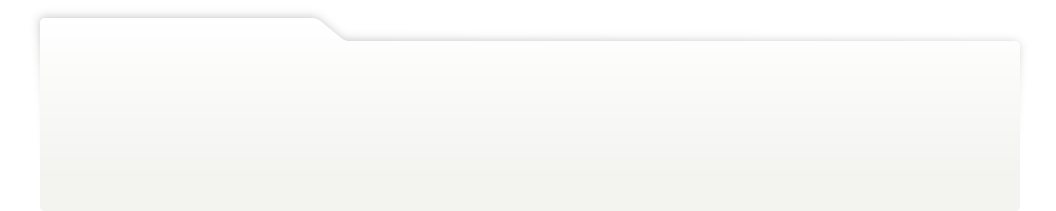
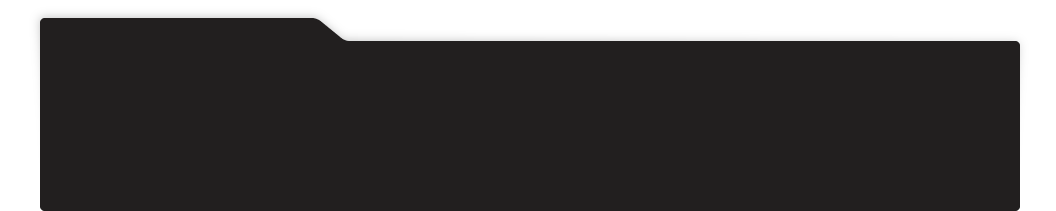
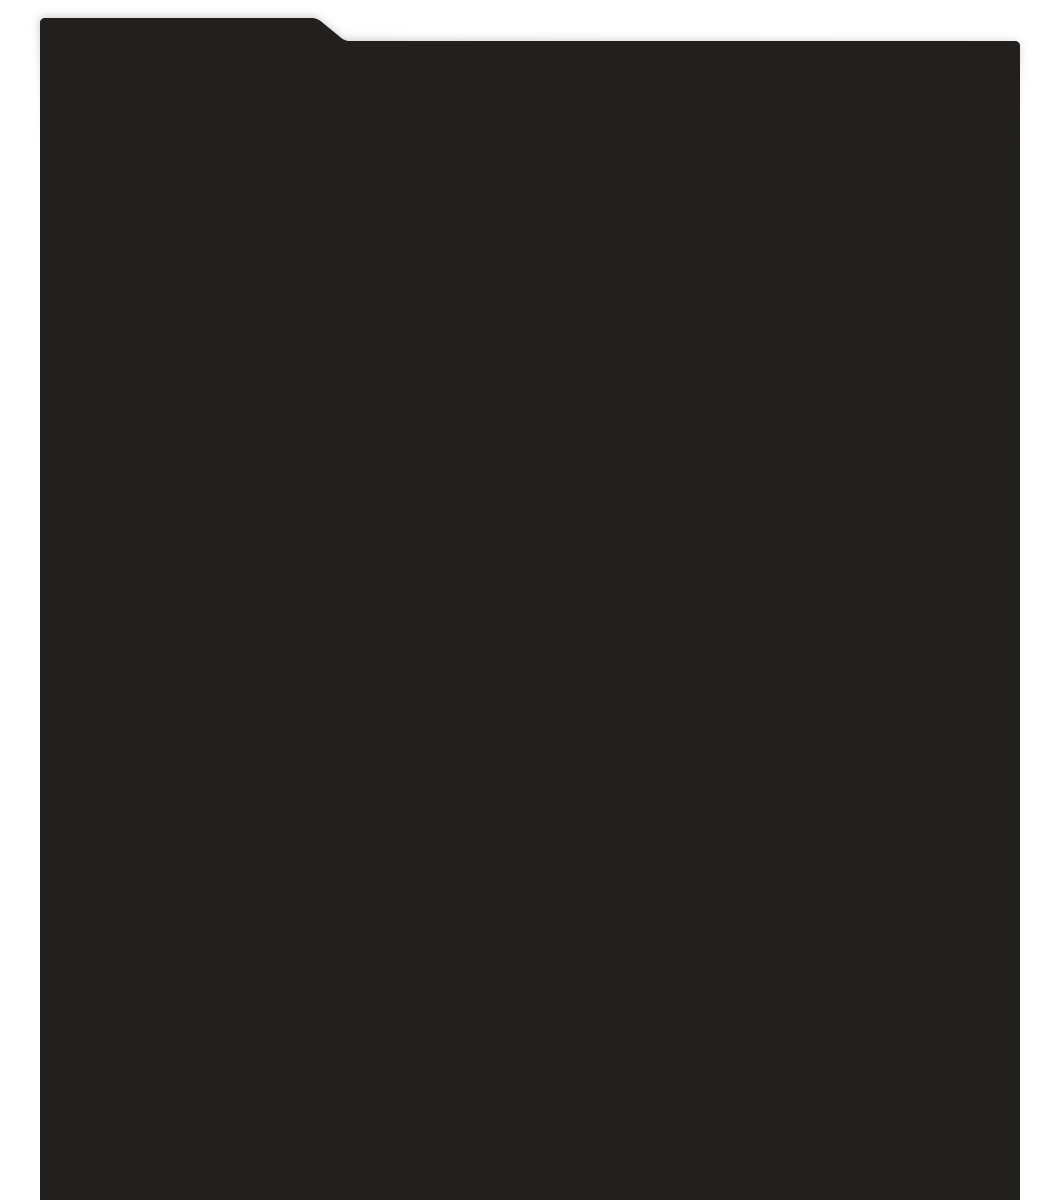
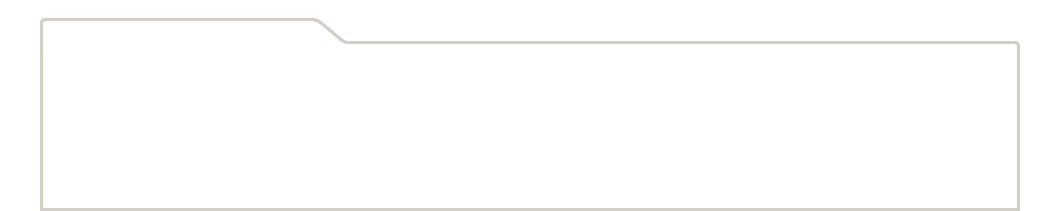
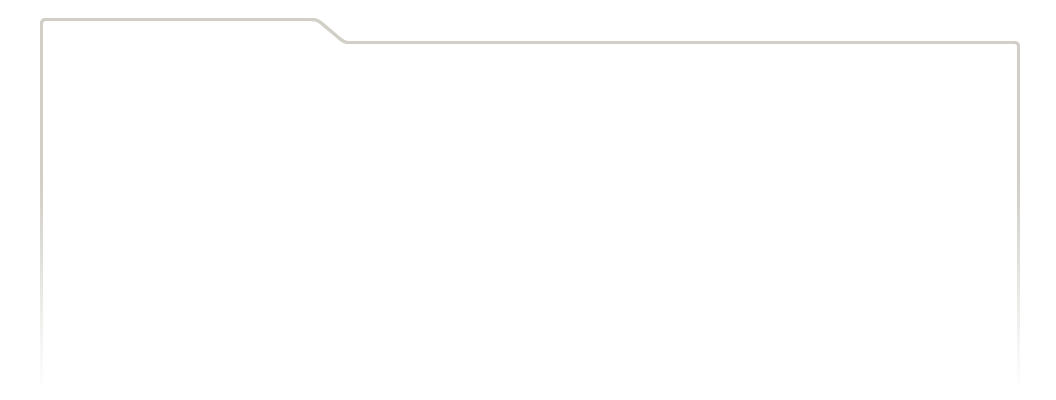
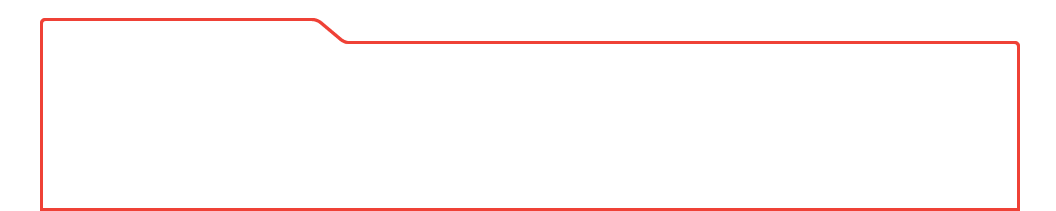
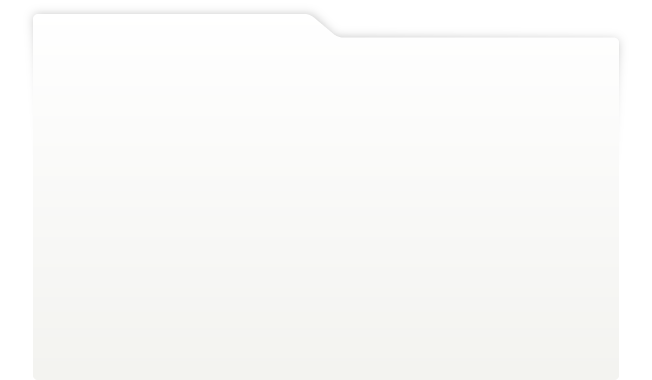
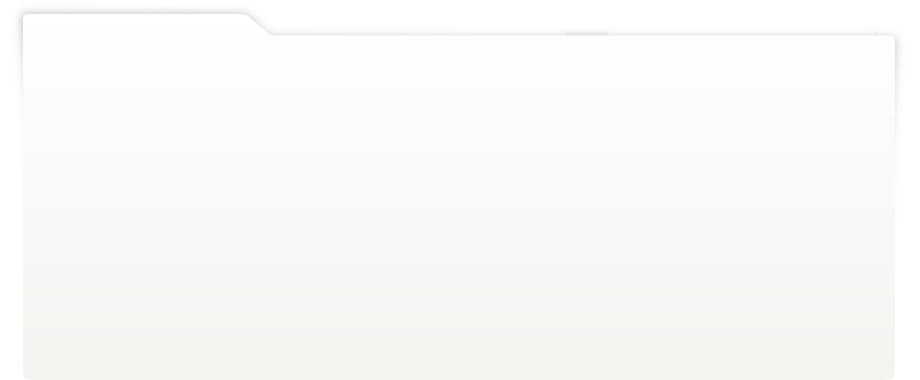
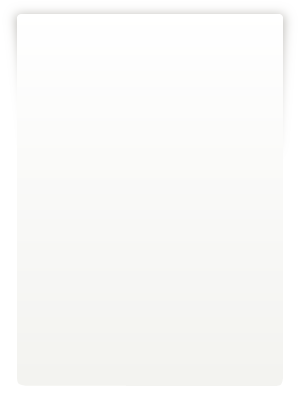
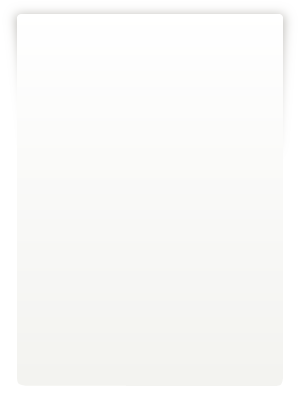
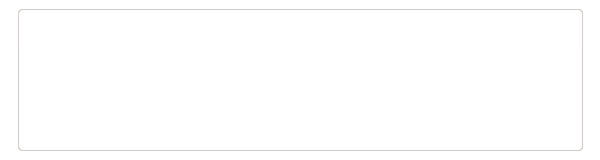
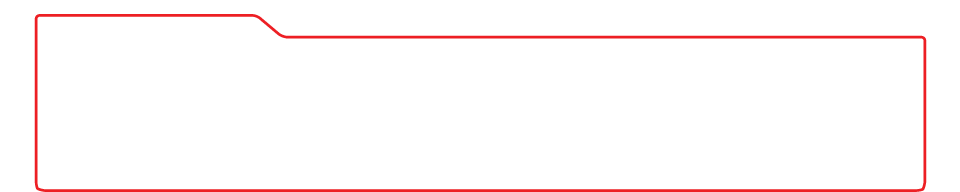
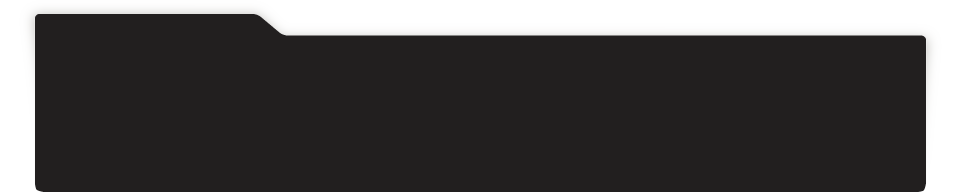
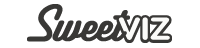
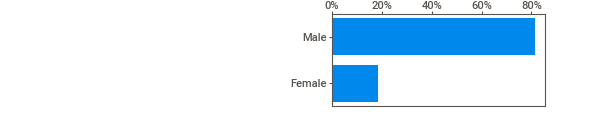
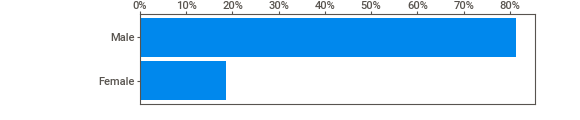
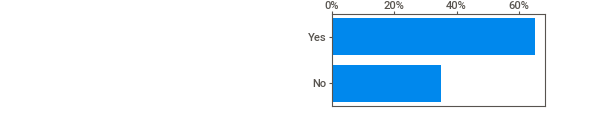
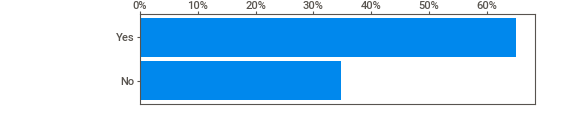
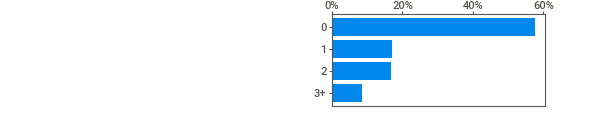
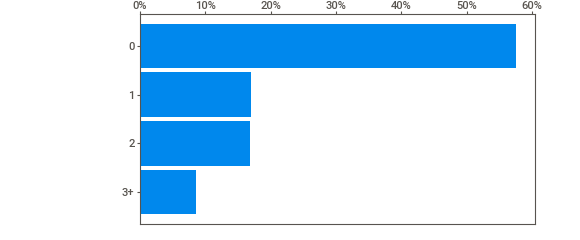
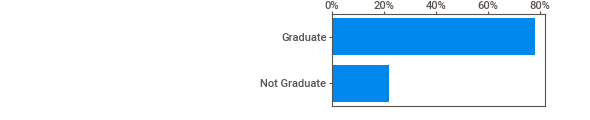
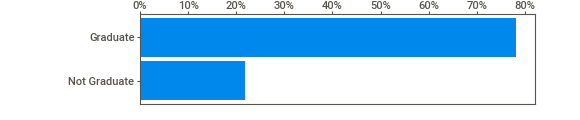
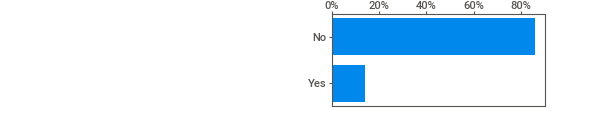
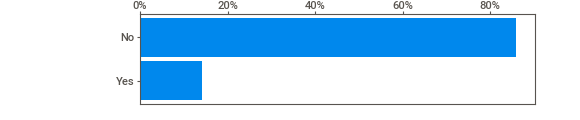
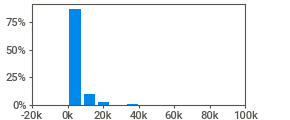
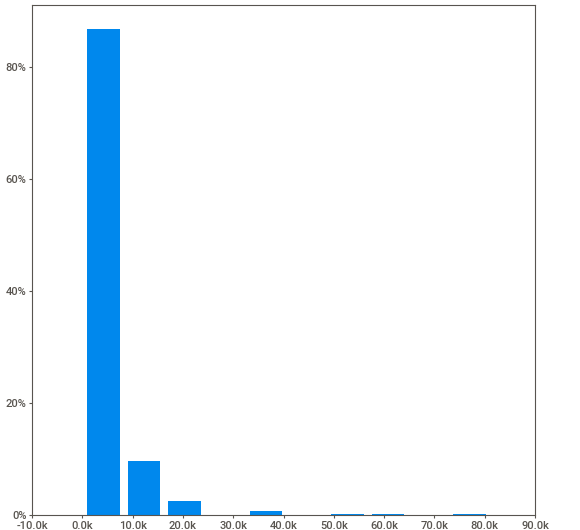
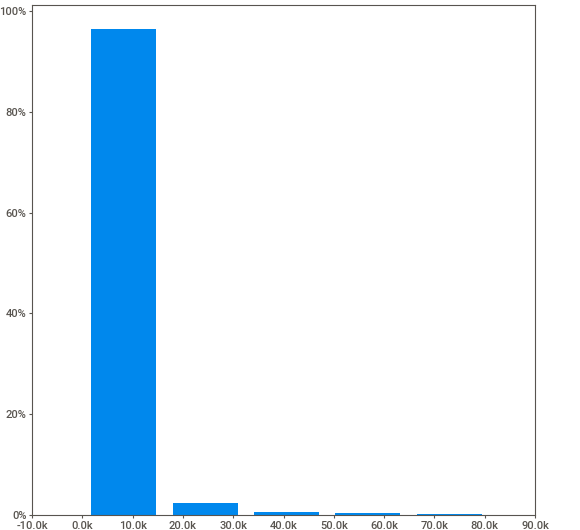
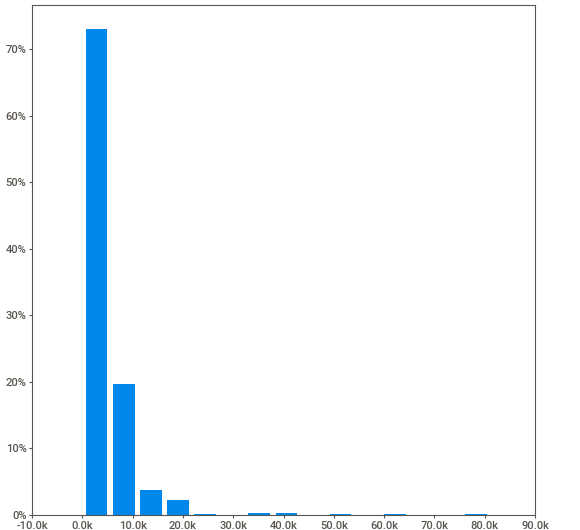
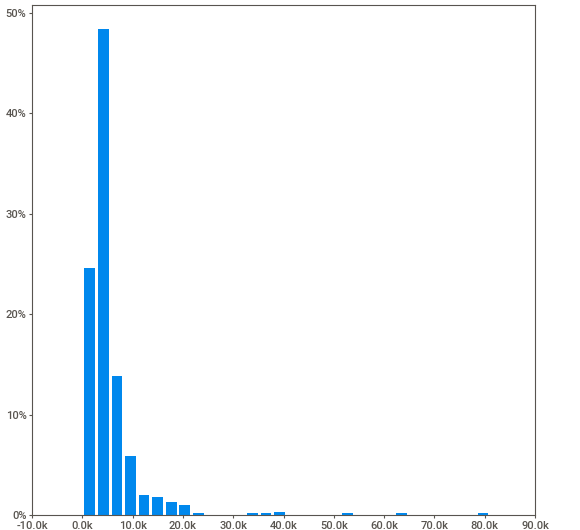
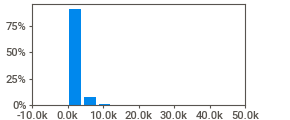
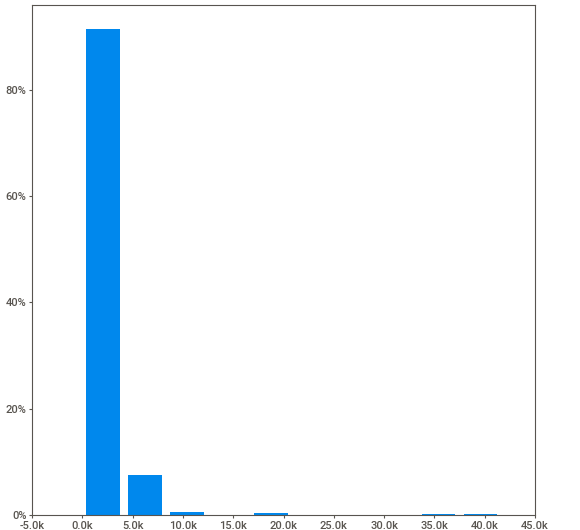
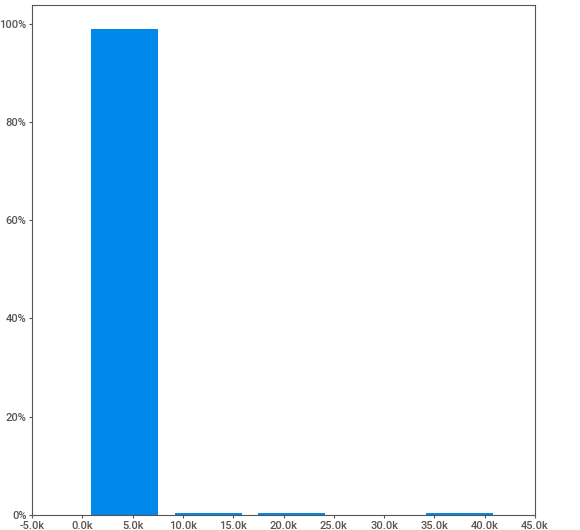
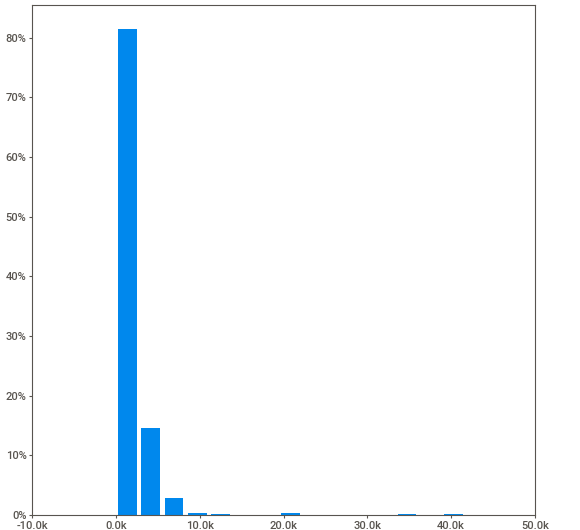
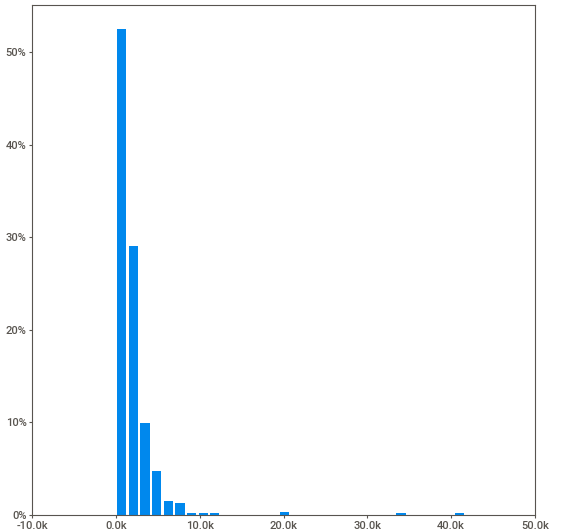
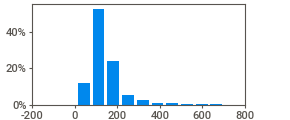
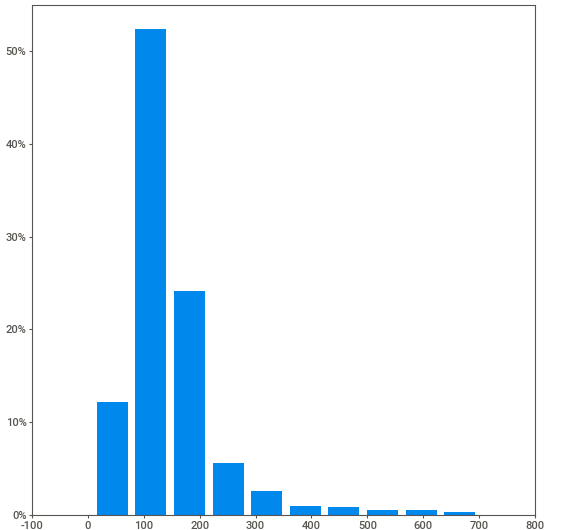
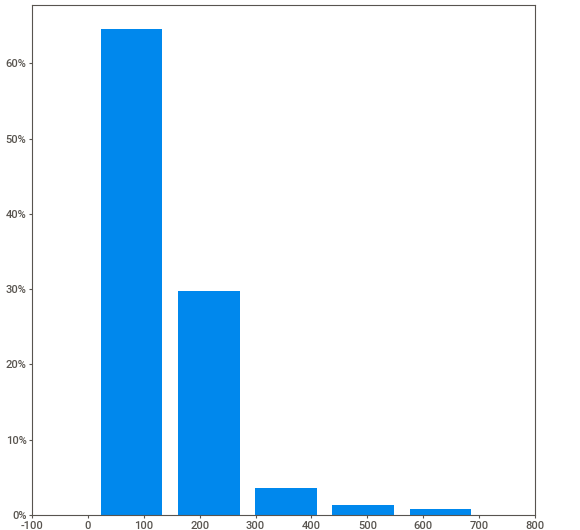
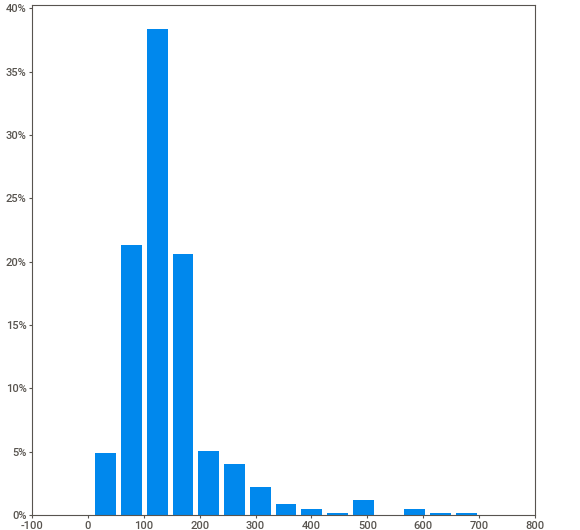
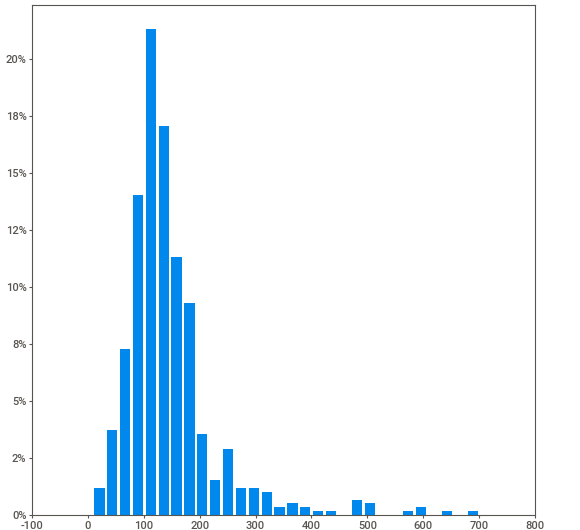
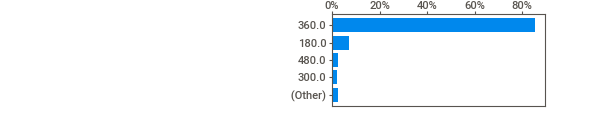
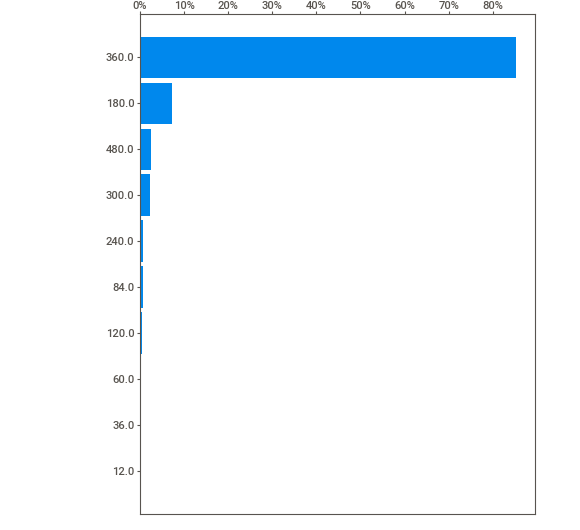
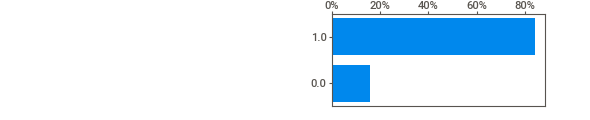
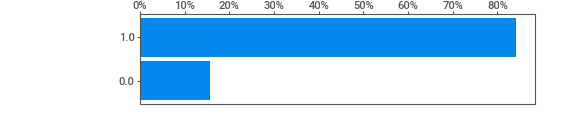
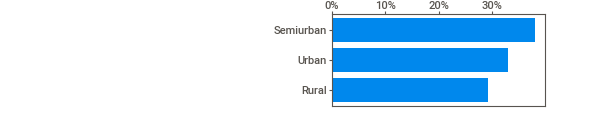
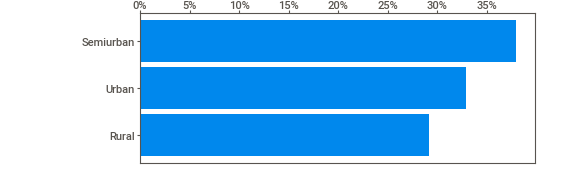
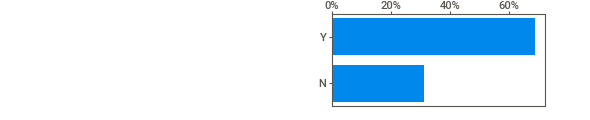
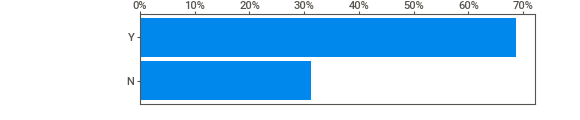
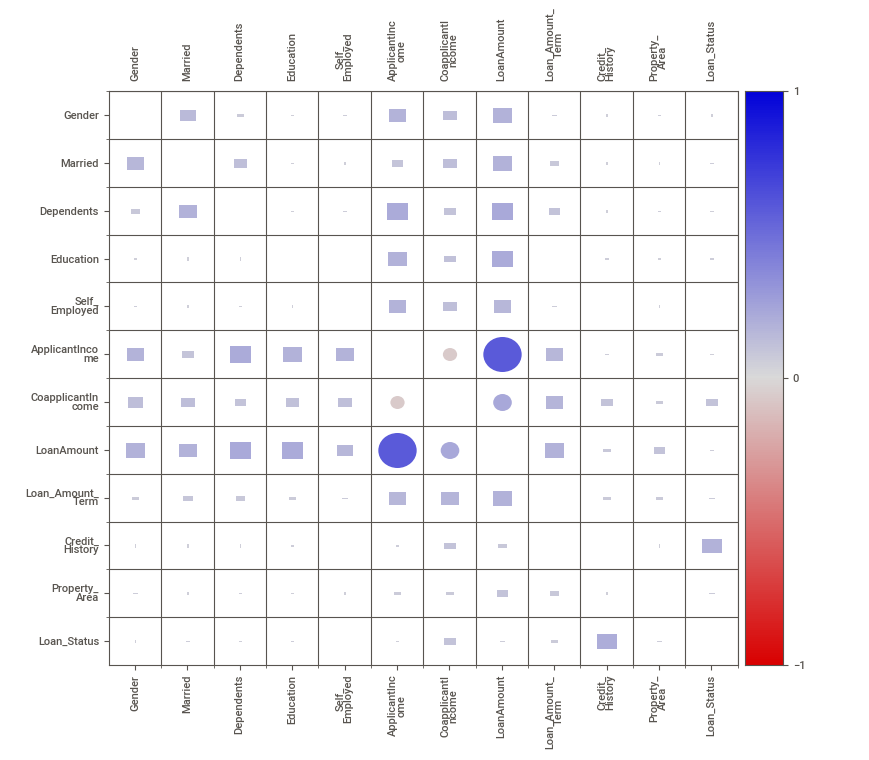
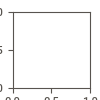

In [12]:
autoEDA = sweetviz.analyze(train)
#autoEDA.show_html()
autoEDA.show_notebook()


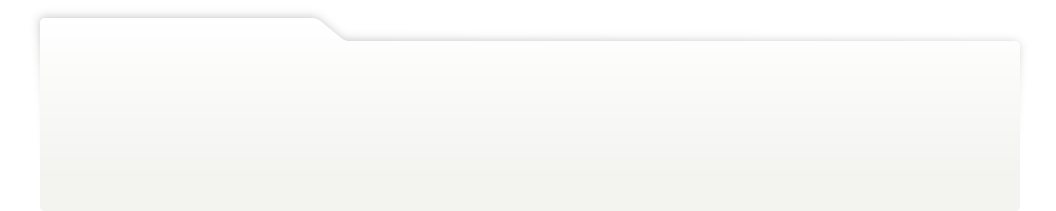
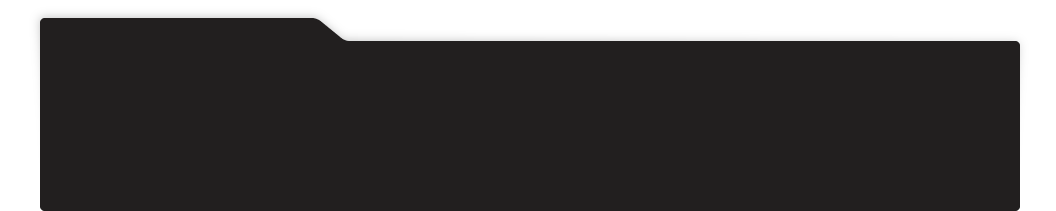
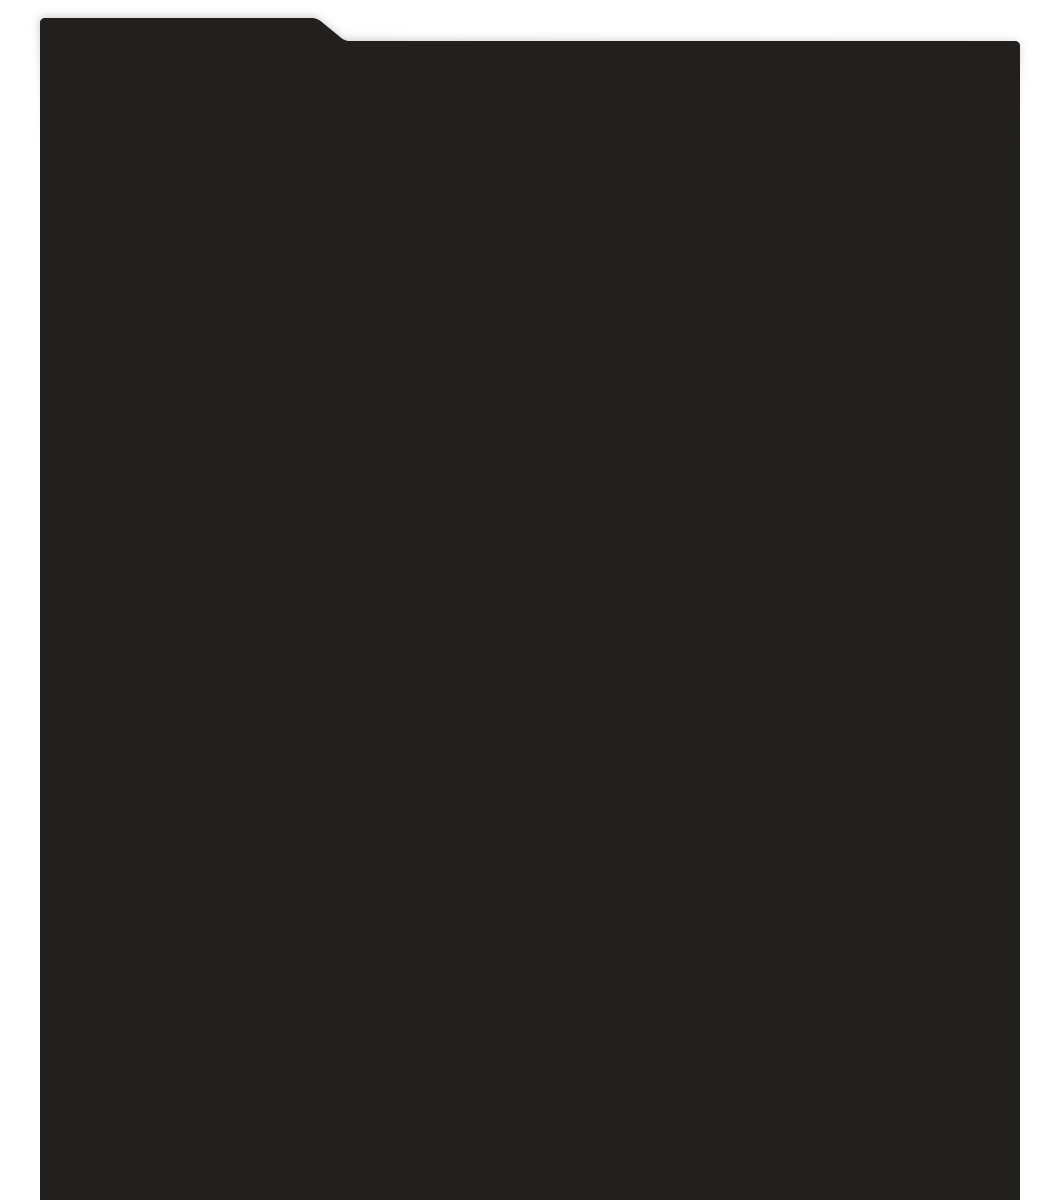
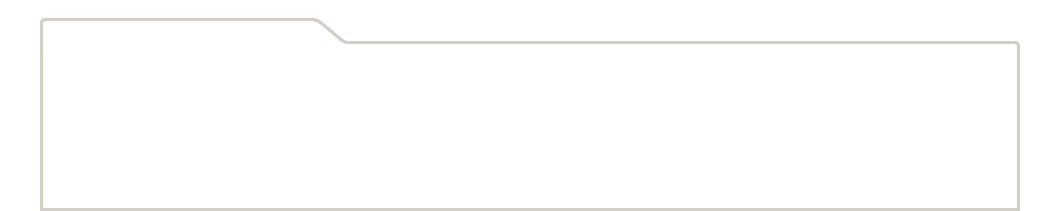
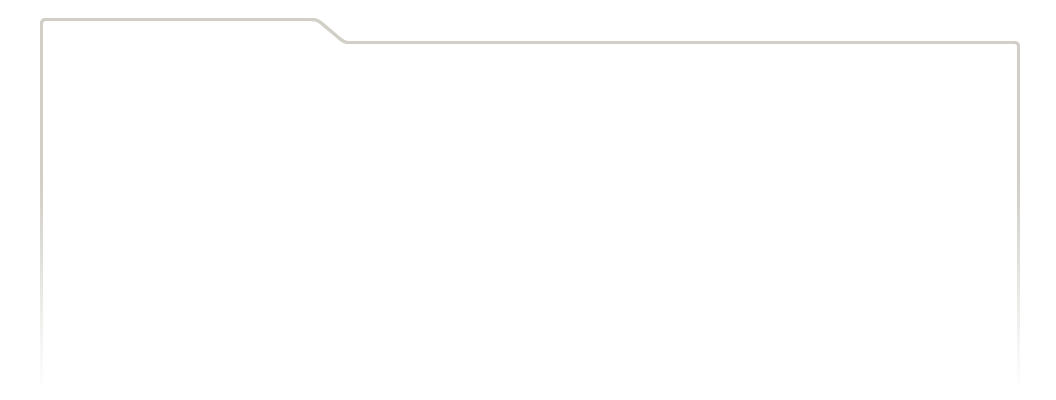
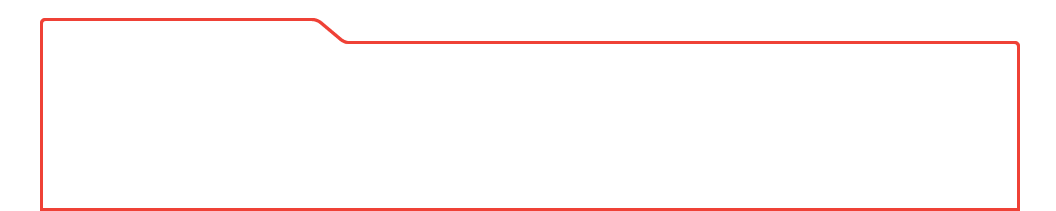
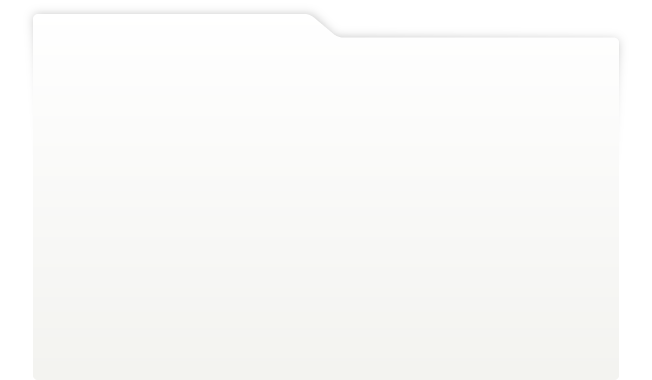
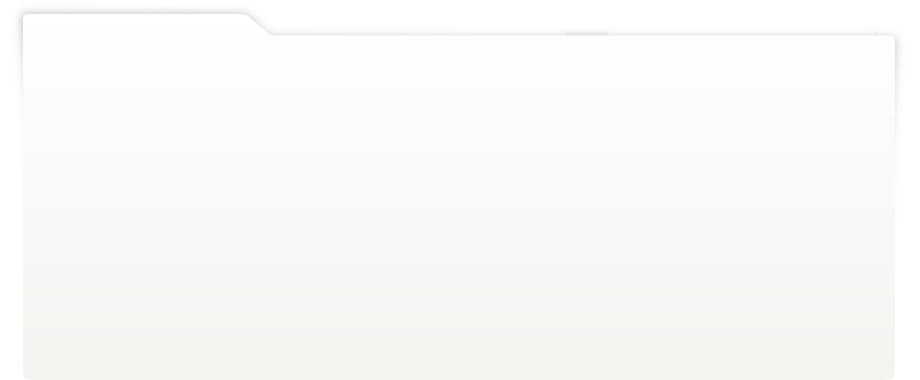
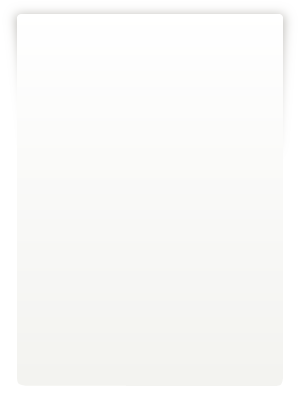
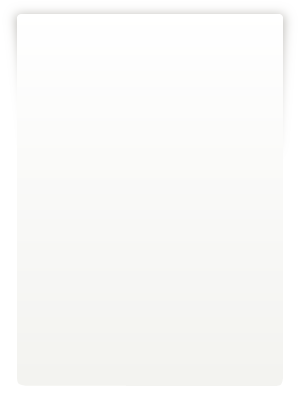
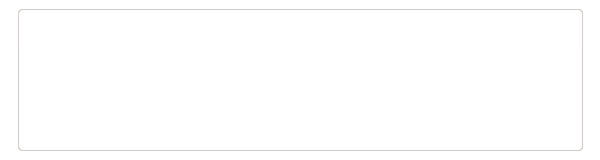
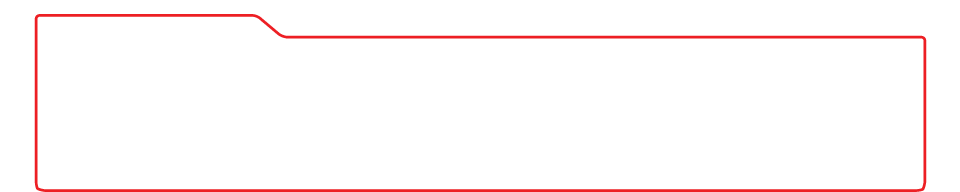
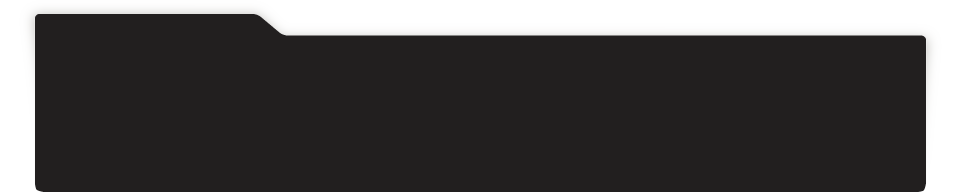
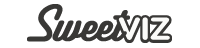
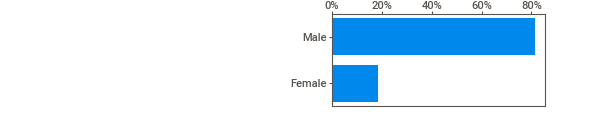
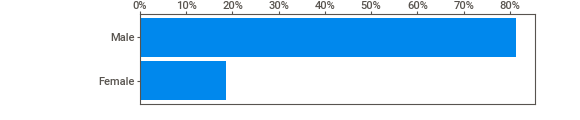
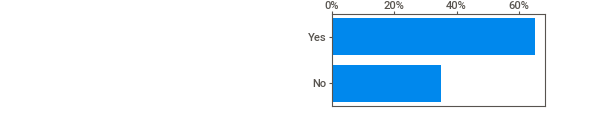
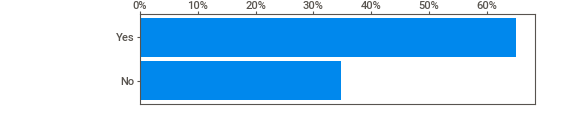
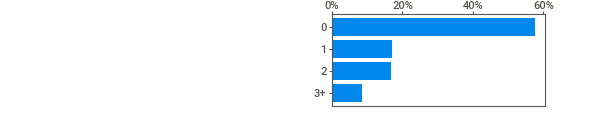
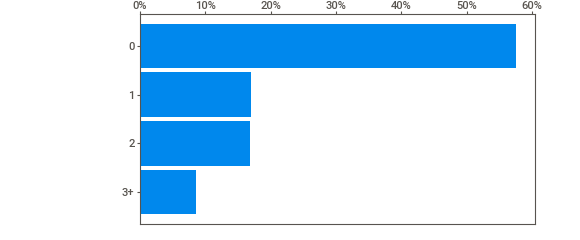
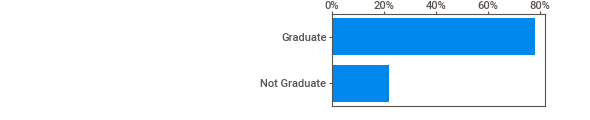
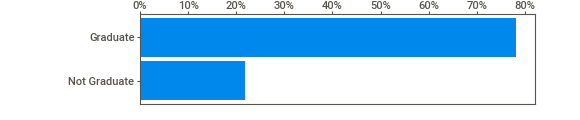
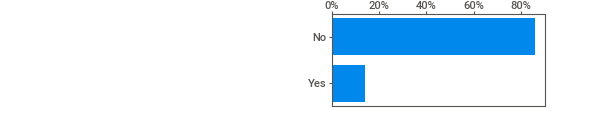
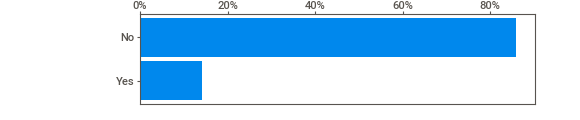
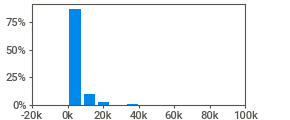
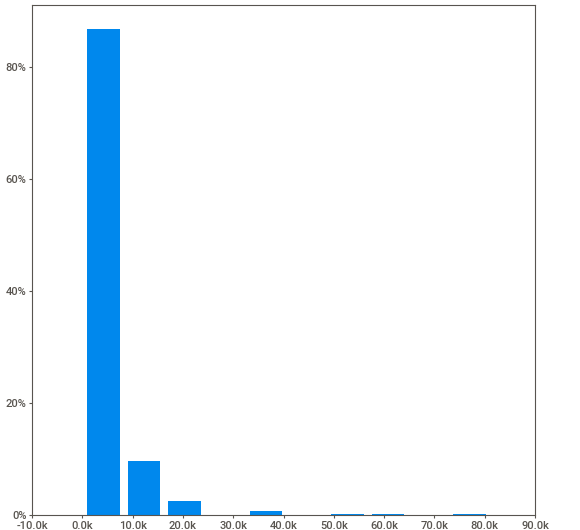
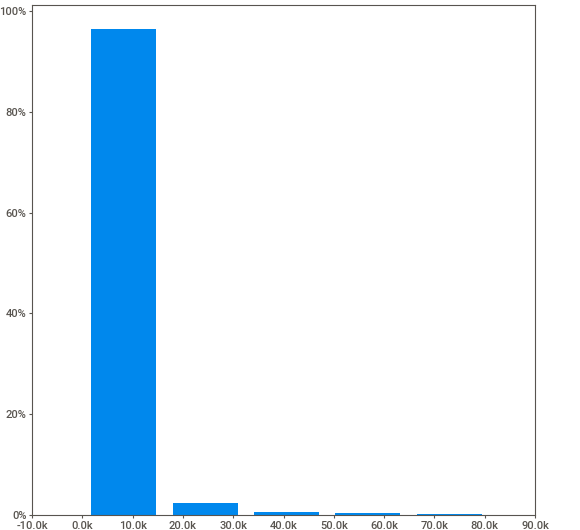
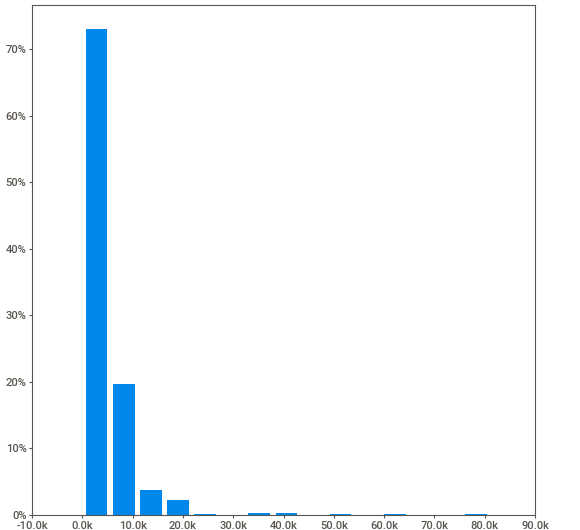
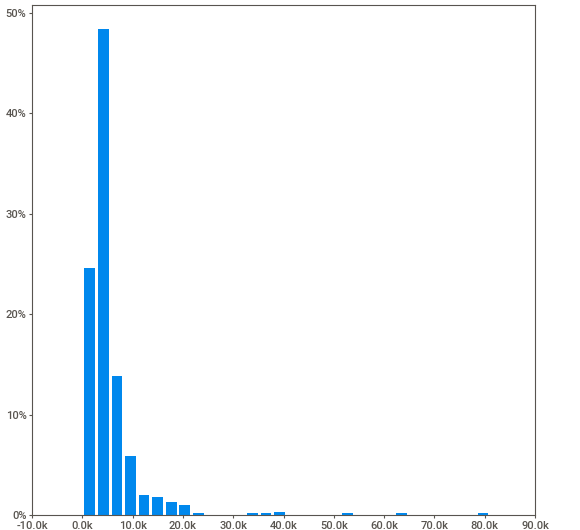
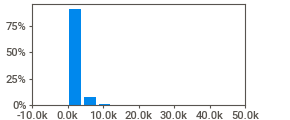
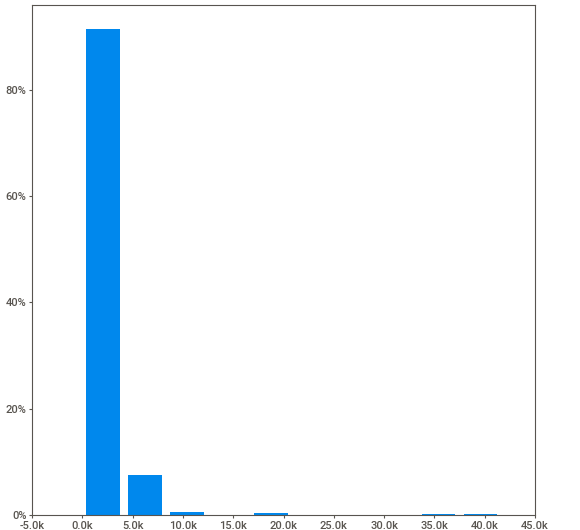
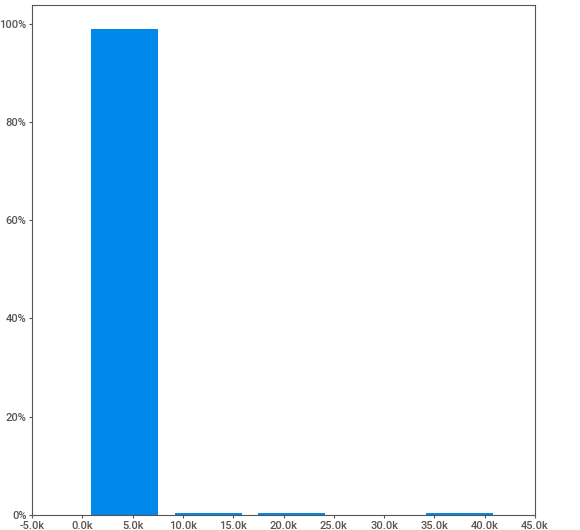
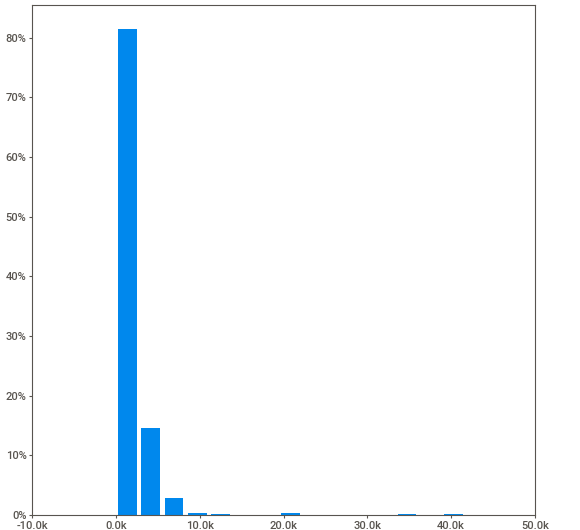
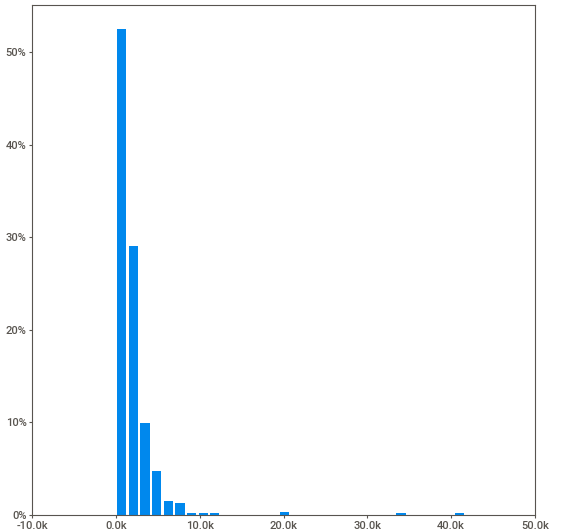
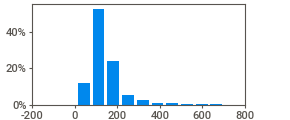
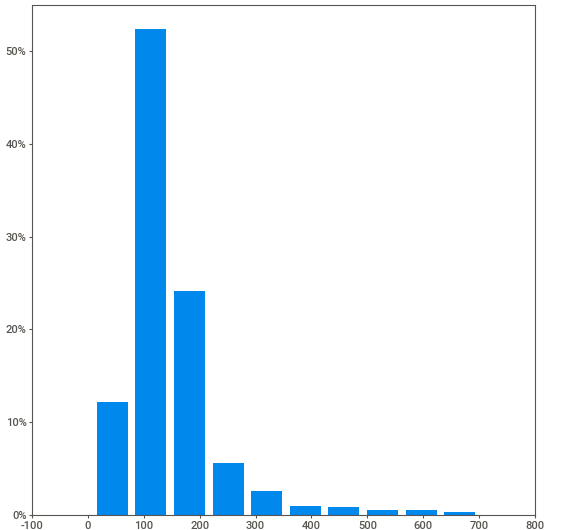
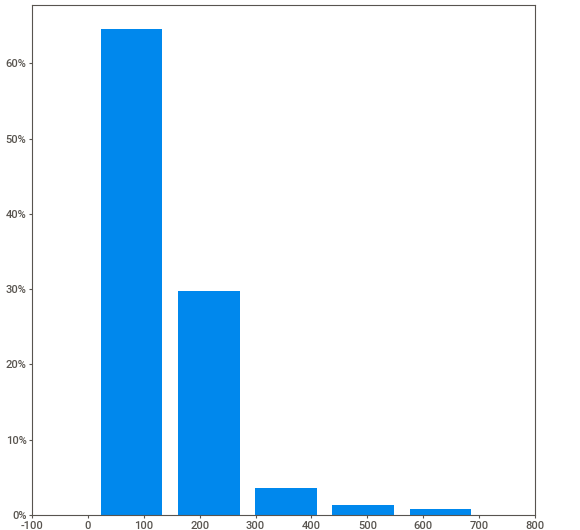
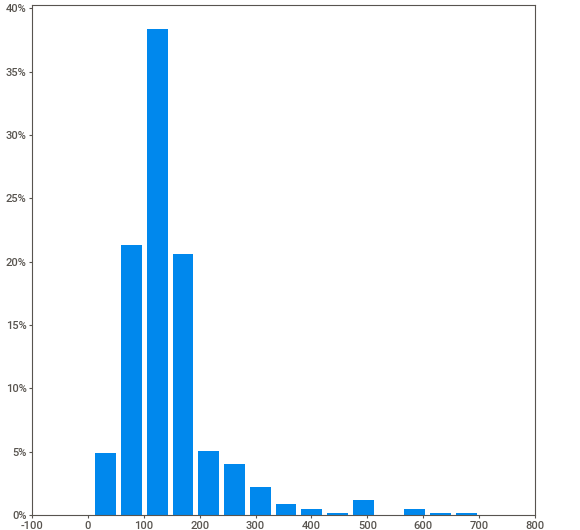
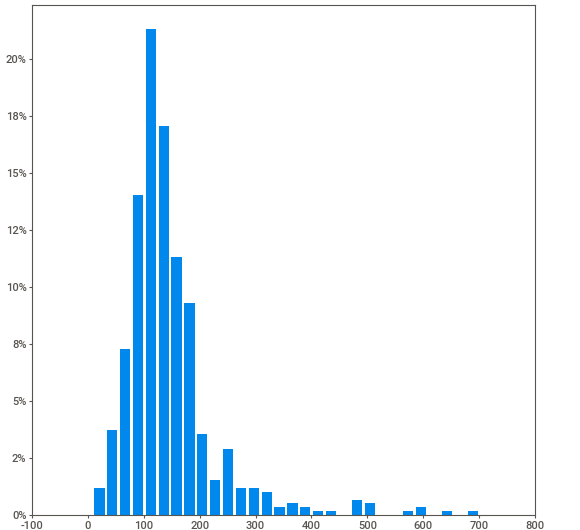
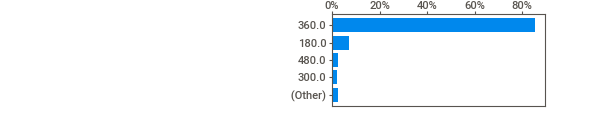
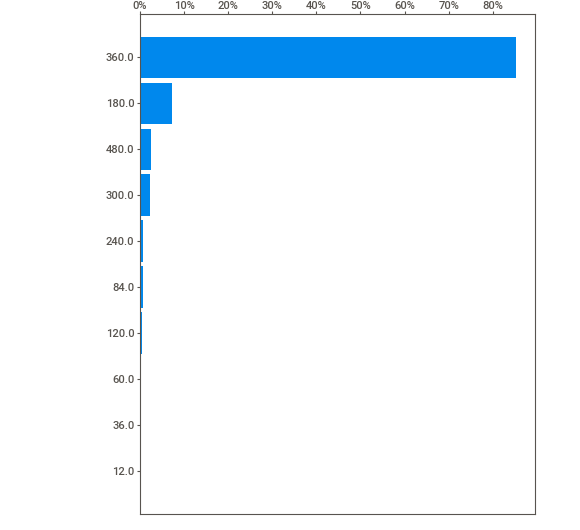
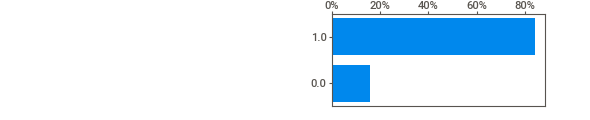
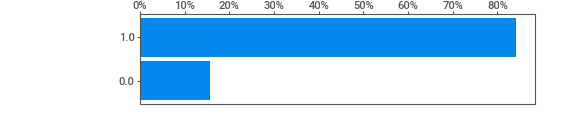
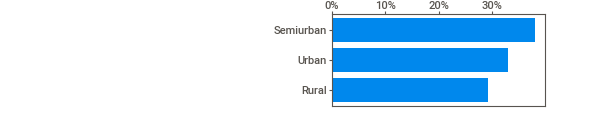
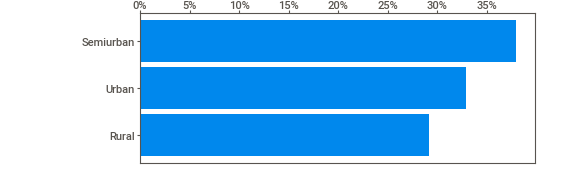
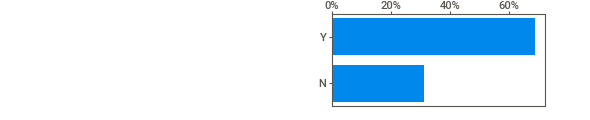
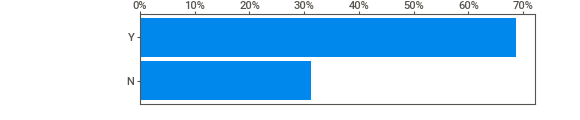
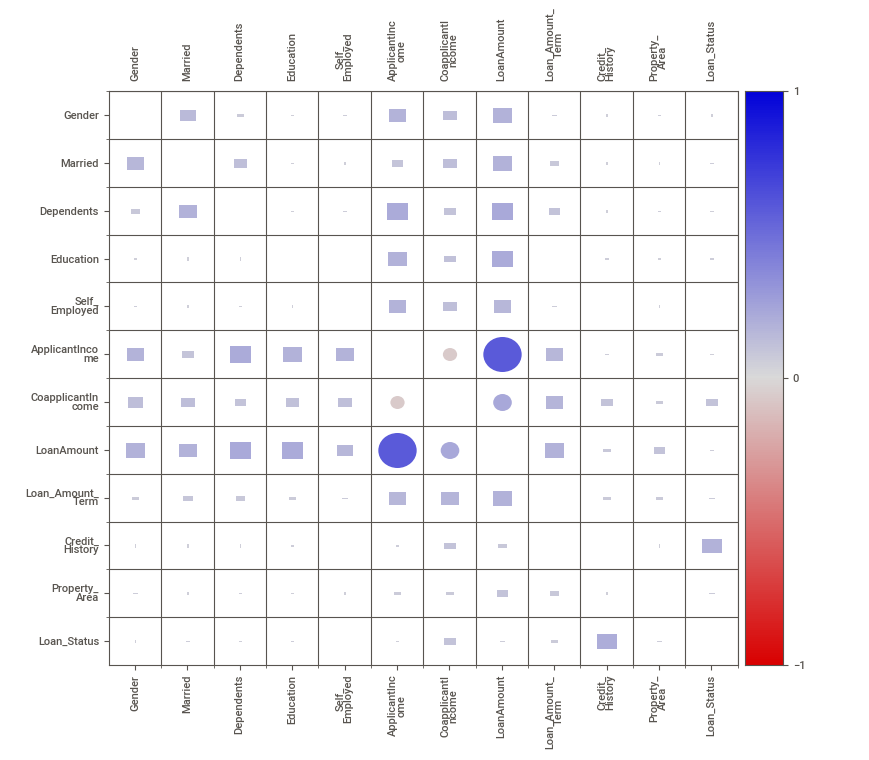
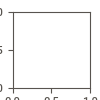

In [43]:
from IPython.display import display, HTML
display(HTML('SWEETVIZ_REPORT.html'))

## Bespoke EDA

In [14]:
## Check for duplicates in the dataset
df.duplicated().sum()

0

In [15]:
## Check for null values 
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

#### **EDA Question 1 ::**
### An overview of the data (number of records, fields and their data types, for both the train and test datasets

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


> The data has 12 features and 1 target variable. The train dataset has 614 records while the test dataset has 367 records.

> The datatypes are as shown below : 

**Loan_ID**              - string  
**Gender**               - string     
**Married**              - string     
**Dependents**           - string      
**Education**            - string     
**Self_Employed**        - string     
**ApplicantIncome**      - integer    
**CoapplicantIncome**    - float     
**LoanAmount**           - float   
**Loan_Amount_Term**     - float     
**Credit_History**       - float     
**Property_Area**        - string   
**Loan_Status** (Target Feature) - string

In [17]:
## Display some summary statics for the numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### **EDA Question 2 ::**

#### What data quality issues exist in both train and test? 

> 1) Some of the fields should be categorical but instead are in string format 

> 2) Many columns have missing values ie `Gender`, `Married`, `Dependents`, `Self_Employed`, `Loan_Amount`, `Loan_Amount_Term`, `Credit_History`

#### **EDA Question 3 ::**

### How do the the loan statuses compare? i.e. what is the distrubition of each?
> 68.7% of the loans are not likely to be defaulted on as the applicants are credit worthy while 31.3% are likely to be defaulted on and thus should not be approved


In [18]:
## Question 3 ::
train['Loan_Status'].value_counts(normalize=True,dropna=False)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

#### **EDA Question 4 ::**
 
#### How do women and men compare when it comes to defaulting on loans in the historical dataset?
> In the historical data, 30.67% of the men defaulted on their loans while 33.04% of the women defaulted on their loans


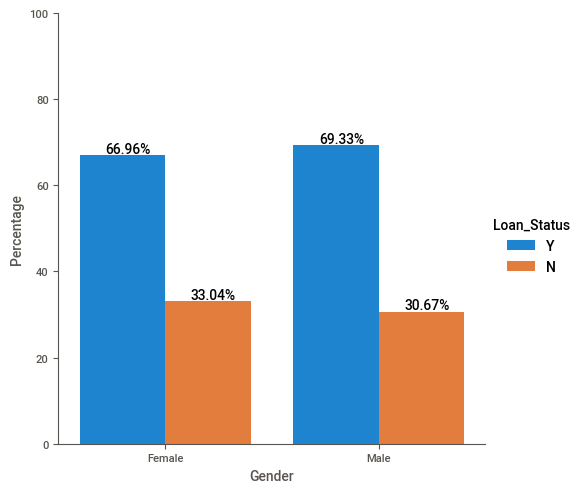

In [19]:
## Question 4::
plot_df = pd.DataFrame(train.groupby('Gender')['Loan_Status'].value_counts(normalize=True)*100)
plot_df.columns = ['Percentage']
plot_df = plot_df.reset_index()
g = sns.catplot(data=plot_df, x='Gender', y='Percentage', hue='Loan_Status', kind='bar')
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+.12
    txt_y = p.get_height()+.5
    g.ax.text(txt_x,txt_y,txt)

#### **EDA Question 5 ::**

### How many of the loan applicants have dependents based on the historical dataset?
> In the historical data, 269 of the 614 loan applicants have dependents, which represents  43.8% of the applicants


In [20]:
##Question 5::
(train['Dependents']!='0').value_counts(normalize=True)
#train['Dependents'].value_counts()

False    0.561889
True     0.438111
Name: Dependents, dtype: float64

#### **EDA Question 6 ::**
### How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 
> Loan applicants who are self employed have a mean income of 5050 while those who are not self employed earn a mean income of 7380. The median income for loan applicants who are self employed is 3705.5 while the median for those who are not self employed is 5809


In [21]:
## Question 6::
print("\n\n\tMedian applicant incomes by Type of Employment:")
display(pd.DataFrame(train.groupby(['Self_Employed'])['ApplicantIncome'].median()))

print("\n\n\tMean applicant incomes by Type of Employment:")
display(pd.DataFrame(train.groupby(['Self_Employed'])['ApplicantIncome'].mean()))



	Median applicant incomes by Type of Employment:


,ApplicantIncome
Self_Employed,
No,3705.5
Yes,5809.0




	Mean applicant incomes by Type of Employment:


,ApplicantIncome
Self_Employed,
No,5049.748000
Yes,7380.817073


#### **EDA Question 7 ::**

### Are applicants with a credit history more likely to default than those who do not have one?
> Applicants without credit history are much more likely to default on loans than applicants with a credit history. While 92.13% of the loans by applicants without credit history were defaulted on, only 20.42% of the loans by applicants with credit history were defaulted on. 


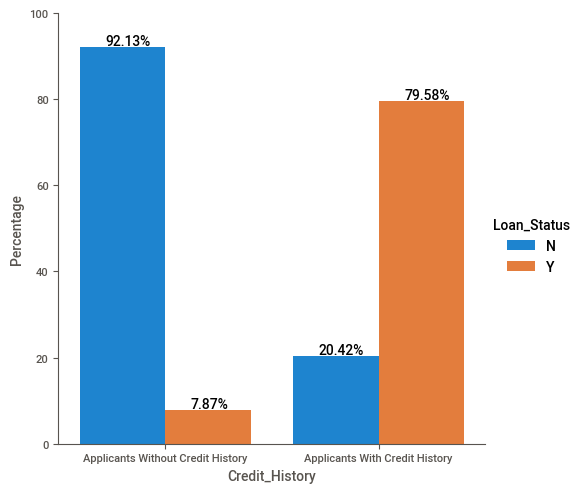

In [22]:
## Question 7 ::
plot_df2 = pd.DataFrame(train.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)*100)
plot_df2.columns = ['Percentage']
plot_df2 = plot_df2.reset_index()
g = sns.catplot(data=plot_df2, x='Credit_History', y='Percentage', hue='Loan_Status', kind='bar')
g.ax.set_ylim(0,100)
g.set_xticklabels(['Applicants Without Credit History', 'Applicants With Credit History'])
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+.12
    txt_y = p.get_height()+.5
    g.ax.text(txt_x,txt_y,txt)

#### **EDA Question 8 ::**

### Is there a correlation between the applicant's income and the loan amount they applied for? 
> Yes, there is a significant positive correlation between an applicant's income and the loan amount they apply for, meaning an applicant with high income is likely to apply for a large loan amount

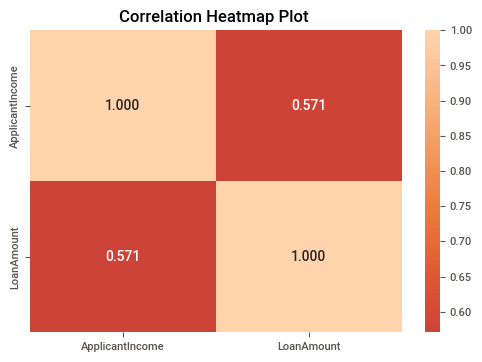

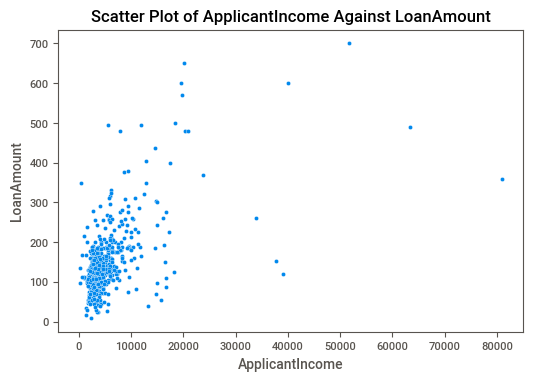

In [23]:
## Question 8 ::
#display(train[['ApplicantIncome', 'LoanAmount']].corr())
sns.heatmap(train[['ApplicantIncome', 'LoanAmount']].corr(), annot=True, fmt='.3f', center=0)
plt.title("Correlation Heatmap Plot ")
plt.show()

sns.scatterplot(data=train, x='ApplicantIncome', y='LoanAmount');
plt.title("Scatter Plot of ApplicantIncome Against LoanAmount")
plt.show()

##Autosklearn  Auto ML


In [24]:
feature_columns = train.columns[1:-1]
print(feature_columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [25]:
## Input data with feature columns 
X = train[feature_columns].copy()

## Convert categorical features to 'category' type
categorical_columns = ['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Property_Area']
X[categorical_columns] = X[categorical_columns].astype('category')
X.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
dtype: object

In [26]:
## label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

## train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# train
autoML = AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [28]:
print('autoML Model Accuracy:', accuracy_score(predictions_autoML, y_test))

autoML Model Accuracy: 0.7967479674796748


In [29]:
print(confusion_matrix(predictions_autoML, y_test))

[[19  1]
 [24 79]]


## Data Preparation

In [30]:
## One hot encode the categorical features
##Leave all categories to represent missing values 
X_oh_encoded = pd.concat([X, pd.get_dummies(X[categorical_columns])], axis=1)
X_oh_encoded = X_oh_encoded.drop(columns=categorical_columns)

## fill the missing numerical columns
X_oh_encoded['LoanAmount'].fillna(X_oh_encoded['LoanAmount'].mean(), inplace=True)
X_oh_encoded['Loan_Amount_Term'].fillna(X_oh_encoded['Loan_Amount_Term'].median(), inplace=True)
X_oh_encoded['Credit_History'].fillna(X_oh_encoded['Credit_History'].mode()[0], inplace=True)
X_oh_encoded.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [31]:
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['Loan_ID', 'Loan_Status']), train['Loan_Status'])

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_oh_encoded, y)

## Scikit-learn Bespoke ML

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("Accuracy on the Train Dataset : ", accuracy_score(xgb.predict(X_train), y_train))
print("Accuracy on the Train Dataset : ", accuracy_score(xgb.predict(X_val), y_val))
print("\nConfusion matrix : \n", confusion_matrix(xgb.predict(X_val), y_val))

Accuracy on the Train Dataset :  1.0
Accuracy on the Train Dataset :  0.7402597402597403

Confusion matrix : 
 [[20 20]
 [20 94]]


In [34]:
!pip install catboost
clear_output()

In [35]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(verbose=0)
cbc.fit(X_train, y_train)

print("Accuracy on the Train Dataset : ", accuracy_score(cbc.predict(X_train), y_train))
print("Accuracy on the Train Dataset : ", accuracy_score(cbc.predict(X_val), y_val))
print("\nConfusion matrix : \n", confusion_matrix(cbc.predict(X_val), y_val))

Accuracy on the Train Dataset :  0.9173913043478261
Accuracy on the Train Dataset :  0.8181818181818182

Confusion matrix : 
 [[ 19   7]
 [ 21 107]]


In [36]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print("Accuracy on the Train Dataset : ", accuracy_score(lgbm.predict(X_train), y_train))
print("Accuracy on the Train Dataset : ", accuracy_score(lgbm.predict(X_val), y_val))
print("\nConfusion matrix : \n", confusion_matrix(lgbm.predict(X_val), y_val))

Accuracy on the Train Dataset :  0.9978260869565218
Accuracy on the Train Dataset :  0.7467532467532467

Confusion matrix : 
 [[20 19]
 [20 95]]


In [37]:
## Some sklearn classifiers we can try
try:
  import sklearn
  import scipy
  classifiers = sklearn.utils.all_estimators(type_filter='classifier')
  for name, class_ in classifiers:
      if hasattr(class_, 'predict_proba'):
          print(name, class_)
  
except:
  pass

In [38]:
## Scale the data to a range of [0-1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train, y_train)

print("Accuracy on the Train Dataset : ", accuracy_score(lr.predict(X_train), y_train))
print("Accuracy on the Validation Dataset : ", accuracy_score(lr.predict(X_val), y_val))
print("\nConfusion matrix : \n", confusion_matrix(lr.predict(X_val), y_val))

Accuracy on the Train Dataset :  0.8065217391304348
Accuracy on the Validation Dataset :  0.8311688311688312

Confusion matrix : 
 [[ 17   3]
 [ 23 111]]


In [40]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print("Accuracy on the Train Dataset : ", svm.score(X_train, y_train))
print("Accuracy on the Validation Dataset : ", svm.score(X_val, y_val)) 
print("\nConfusion matrix : \n", confusion_matrix(svm.predict(X_val), y_val))

Accuracy on the Train Dataset :  0.8173913043478261
Accuracy on the Validation Dataset :  0.8311688311688312

Confusion matrix : 
 [[ 17   3]
 [ 23 111]]


In [41]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
adb.score(X_train, y_train), adb.score(X_val, y_val)
print("Accuracy on the Train Dataset : ", adb.score(X_train, y_train))
print("Accuracy on the Validation Dataset : ", adb.score(X_val, y_val)) 
print("\nConfusion matrix : \n", confusion_matrix(adb.predict(X_val), y_val))

Accuracy on the Train Dataset :  0.8608695652173913
Accuracy on the Validation Dataset :  0.7662337662337663

Confusion matrix : 
 [[19 15]
 [21 99]]


In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Accuracy on the Train Dataset : ", dt.score(X_train, y_train))
print("Accuracy on the Validation Dataset : ", dt.score(X_val, y_val)) 
print("\nConfusion matrix : \n", confusion_matrix(dt.predict(X_val), y_val))

Accuracy on the Train Dataset :  1.0
Accuracy on the Validation Dataset :  0.6688311688311688

Confusion matrix : 
 [[22 33]
 [18 81]]


The AutoML model has an accuracy of 78.9%. The bespoke classifier models tried have accuracies ranging from 71% to 80%. The models are tried right out of the box, which means that with parameter fine tuning, we can expect to get higher accuracies. Thus, we can make a case for bespoke modelling since accuracy is very important in this application case and any slight improvement in the expected level of accuracy should be pursued.